In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from common import set_plot_style, load_font, colors

In [2]:
ROOT_FOLDER = Path("/home/robin/projects/TEDx/")

file_csv = ROOT_FOLDER / "data" / "FoodEmission" / "food-emissions-supply-chain.csv"

images_dir = Path(ROOT_FOLDER / "output" / "images" / "food_emission")
images_dir.mkdir(parents=True, exist_ok=True)

load_font()
set_plot_style()


In [3]:
fe = pd.read_csv(file_csv)
# remove unused columns
fe = fe.drop(columns=["Code", "Year"])
# set entity as index
fe = fe.set_index("Entity")
fe.index.name = "Prodotto"
# sort by total emission
fe = fe.assign(total=fe.sum(axis=1))
fe = fe.sort_values(by="total", ascending=True)
fe = fe.drop(columns=["total"])
# aggregate some columns
fe = fe.assign(Vendita=fe["Vendita"] + fe["Confezionamento"])
fe = fe.drop(columns=["Confezionamento"])
fe = fe.assign(Coltivazione_allevamento=fe["Coltivazione"] + fe["Allevamento"])
fe = fe.drop(columns=["Coltivazione", "Allevamento"])
fe = fe.rename(columns={"Coltivazione_allevamento": "Coltivazione e allevamento"})
# change column order
fe = fe[
    [
        "Uso del suolo",
        "Coltivazione e allevamento",
        "Processamento",
        "Trasporto",
        "Vendita",
        "Scarti",
    ]
]
fe.head()

,Uso del suolo,Coltivazione e allevamento,Processamento,Trasporto,Vendita,Scarti
Prodotto,,,,,,
Agrumi,-0.145954,0.306733,0.00000,0.093855,0.061420,0.071570
Radici,0.013389,0.153994,0.00000,0.113770,0.083517,0.061610
Mele,-0.028951,0.225816,0.00382,0.095804,0.061104,0.070808
Noci,-3.257812,3.374407,0.05142,0.106734,0.166386,-0.008000
Patate,-0.001315,0.193083,0.00000,0.093867,0.083793,0.090706


In [4]:
fe_meat = fe.loc[
    [
        "Piselli",
        "Altri legumi",
        "Tofu",
        "Uova",
        "Carne di pollame",
        "Carne di maiale",
        "Pesce (allevato)",
        "Gamberetti (allevati)",
        "Agnello e montone",
        "Manzo (da carne)",
    ]
]

fe_vegetables = fe.loc[
    [
        "Mele",
        "Brassicacee",
        "Altre verdure",
        "Banane",
        "Orzo",
        "Grano e segale",
        "Mais",
        "Caffè",
        "Cioccolato fondente",
    ]
]

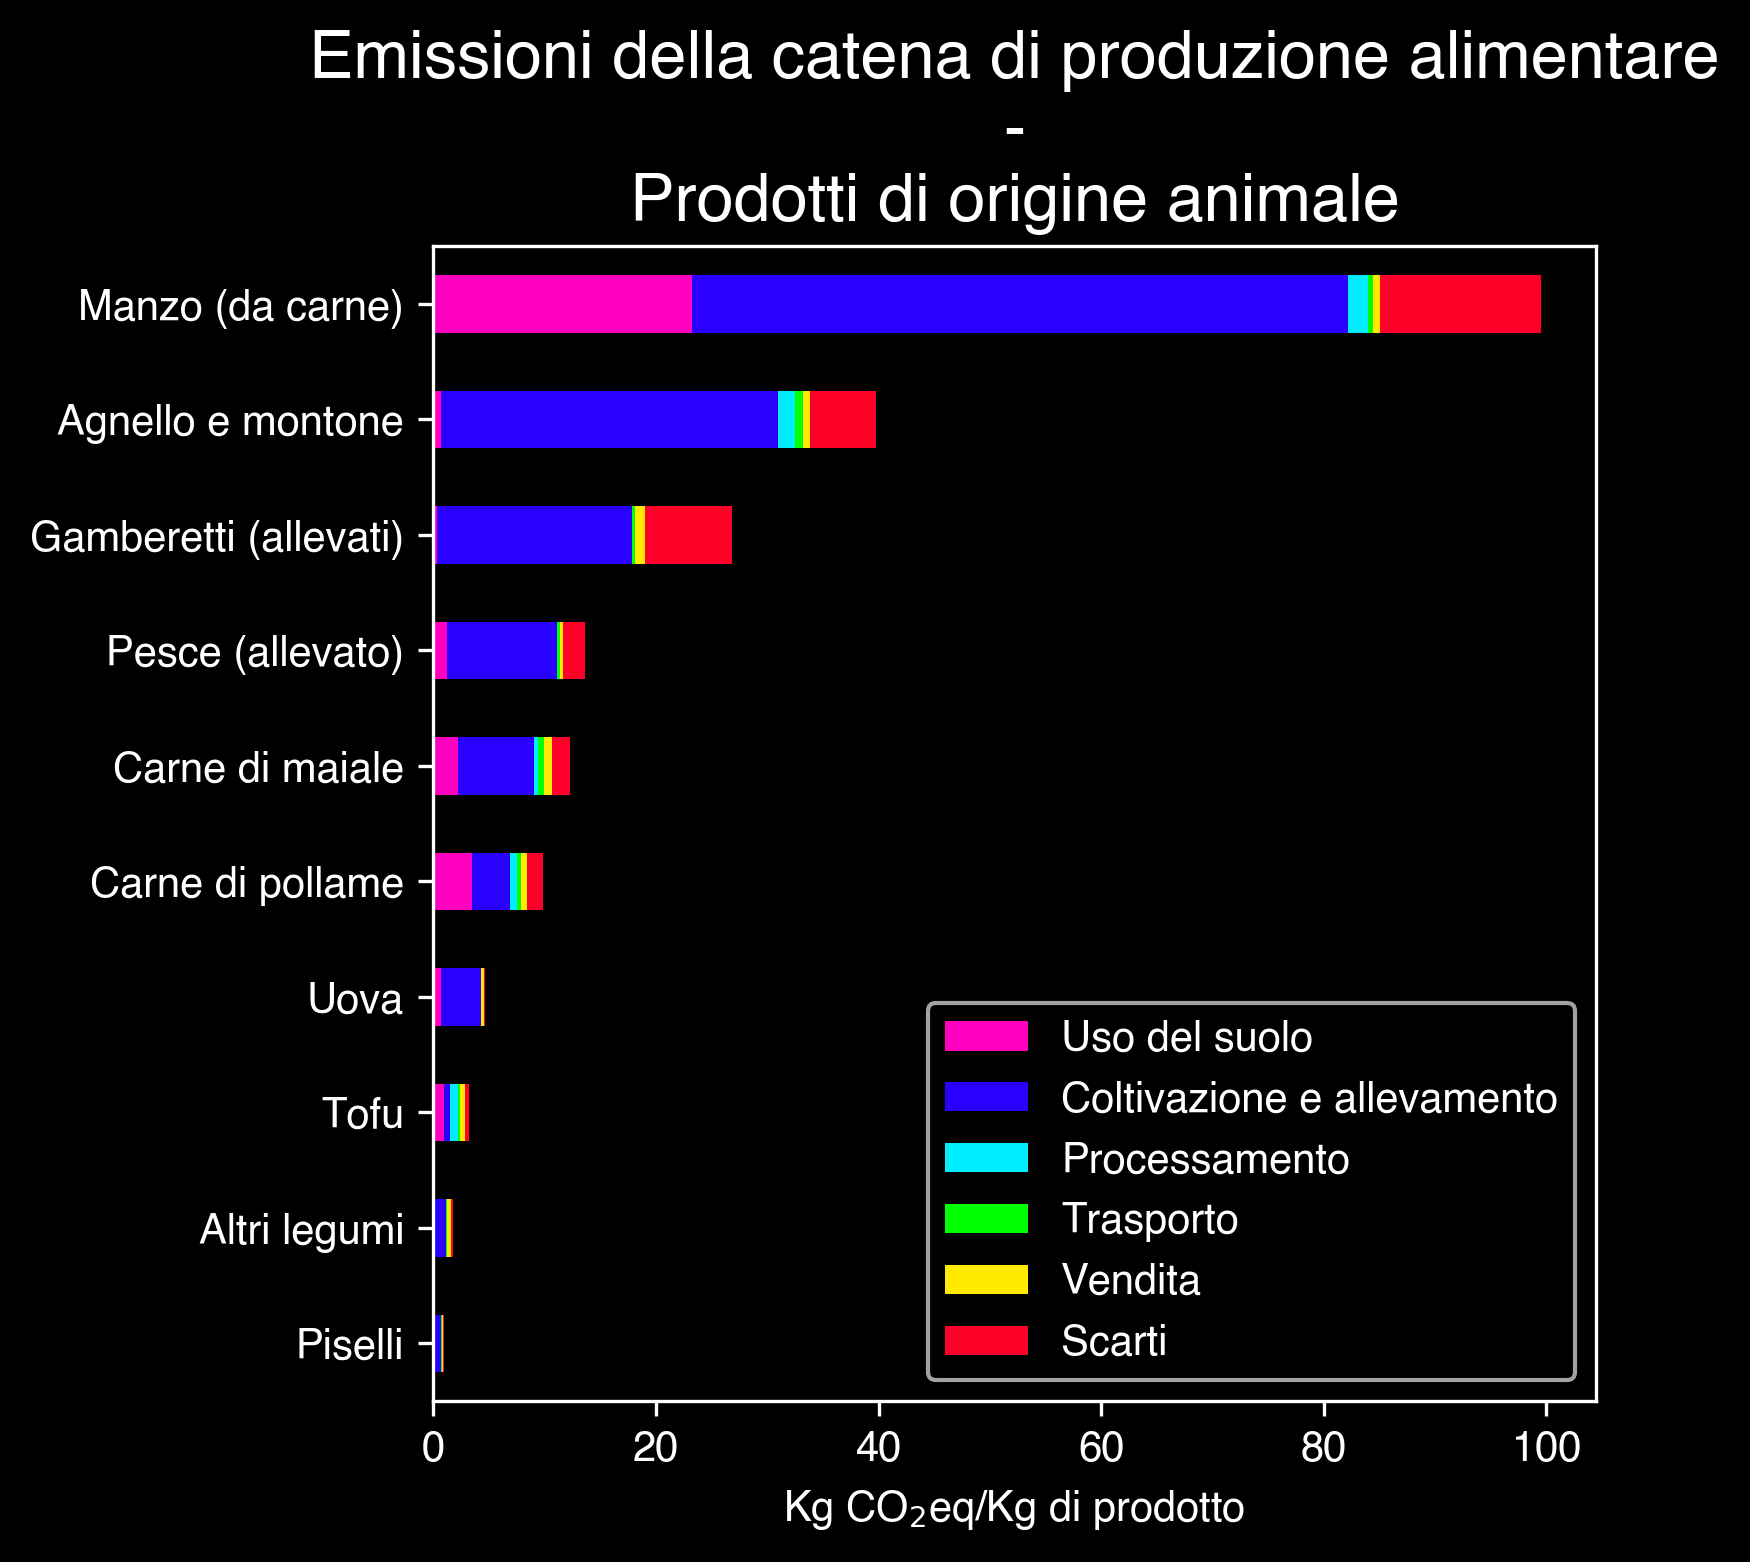

In [5]:
# meat
fig, ax = plt.subplots(figsize=(5, 5))
fe_meat.plot.barh(stacked=True, ax=ax, cmap="gist_rainbow_r")
ax.set_title("Emissioni della catena di produzione alimentare\n-\nProdotti di origine animale")
ax.set_xlabel("Kg CO$_2$eq/Kg di prodotto")
ax.set_ylabel(None)
ax.set_xbound(lower=0)
ax.legend(loc="lower right")
fig.savefig(images_dir / "food_emission_meat.png")


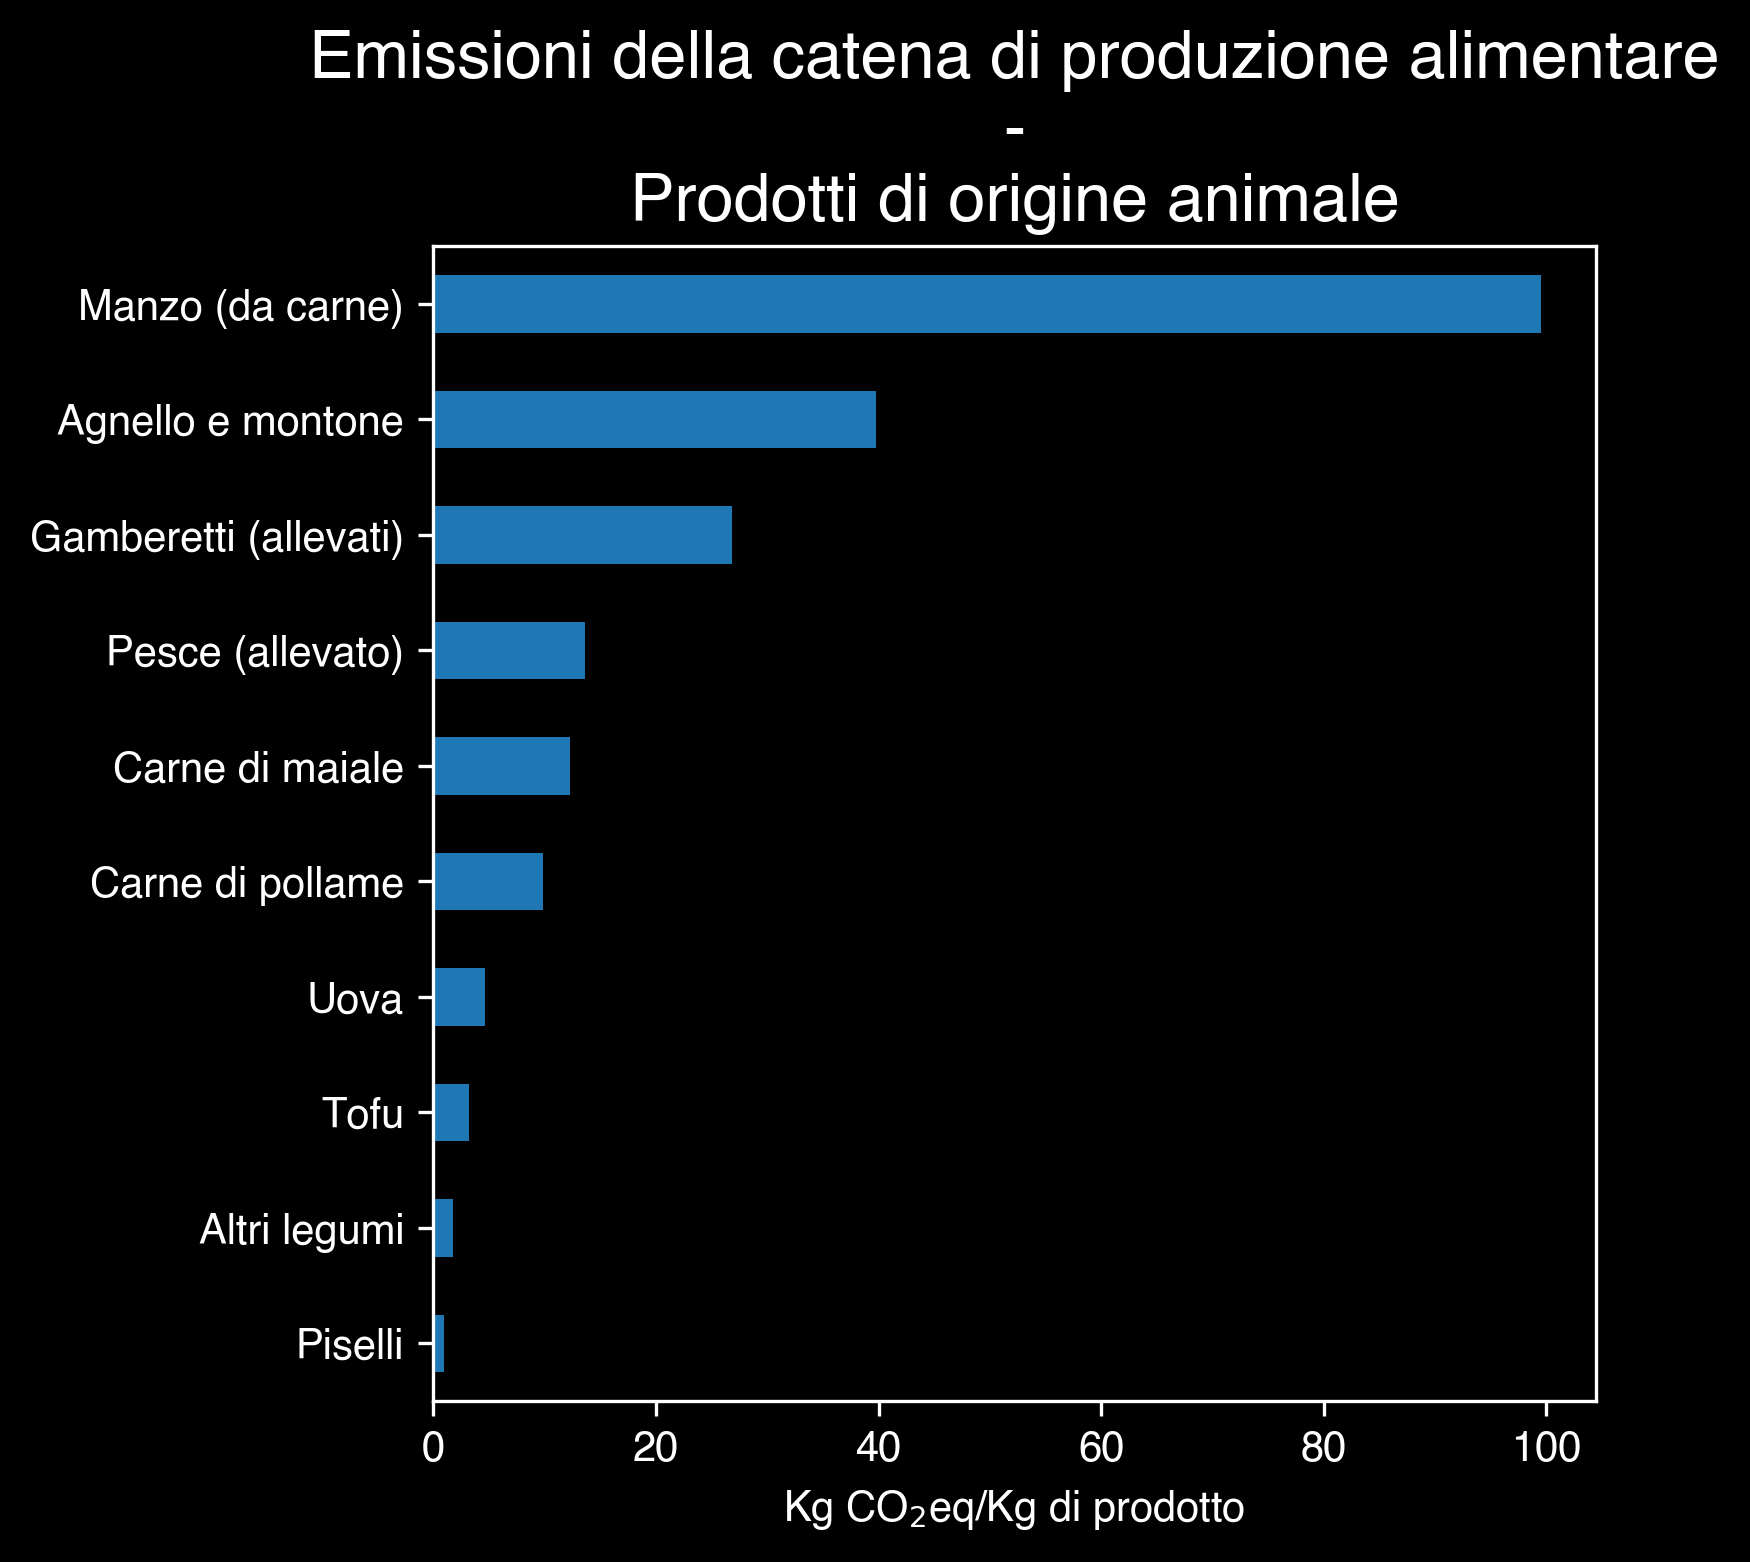

In [6]:
# meat
fig, ax = plt.subplots(figsize=(5, 5))
fe_meat.sum(axis=1).plot.barh(ax=ax)
ax.set_title(
    "Emissioni della catena di produzione alimentare\n-\nProdotti di origine animale"
)
ax.set_xlabel("Kg CO$_2$eq/Kg di prodotto")
ax.set_ylabel(None)
fig.savefig(images_dir / "food_emission_meat_total.png")

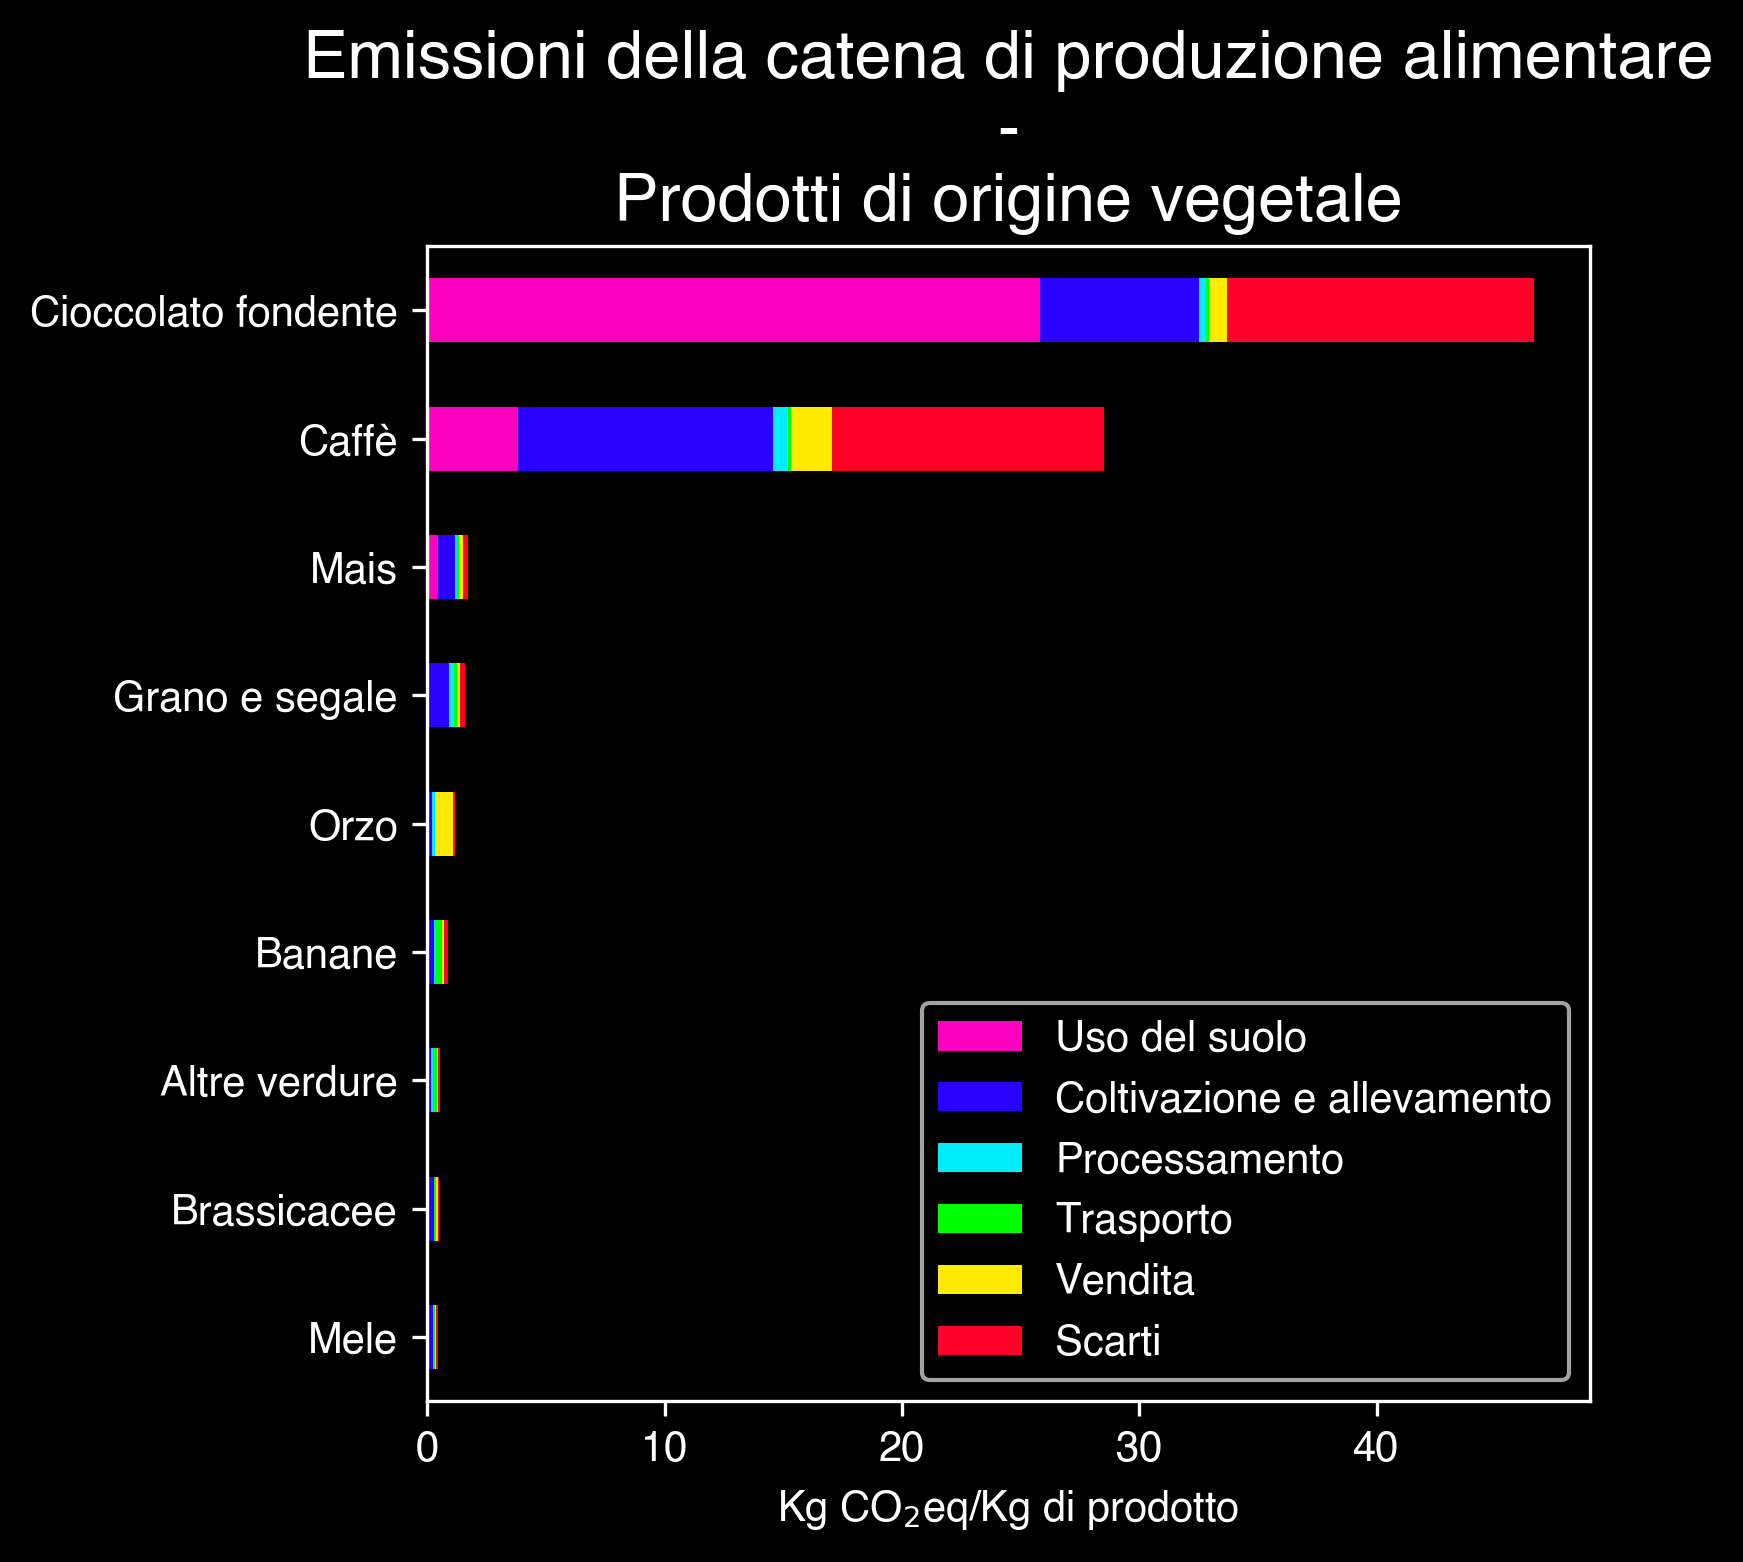

In [7]:
# vegetables
fig, ax = plt.subplots(figsize=(5, 5))
fe_vegetables.plot.barh(stacked=True, ax=ax, cmap="gist_rainbow_r")
ax.set_title("Emissioni della catena di produzione alimentare\n-\nProdotti di origine vegetale")
ax.set_xlabel("Kg CO$_2$eq/Kg di prodotto")
ax.set_ylabel(None)
ax.set_xbound(lower=0)
ax.legend(loc="lower right")
fig.savefig(images_dir / "food_emission_vegetables.png")


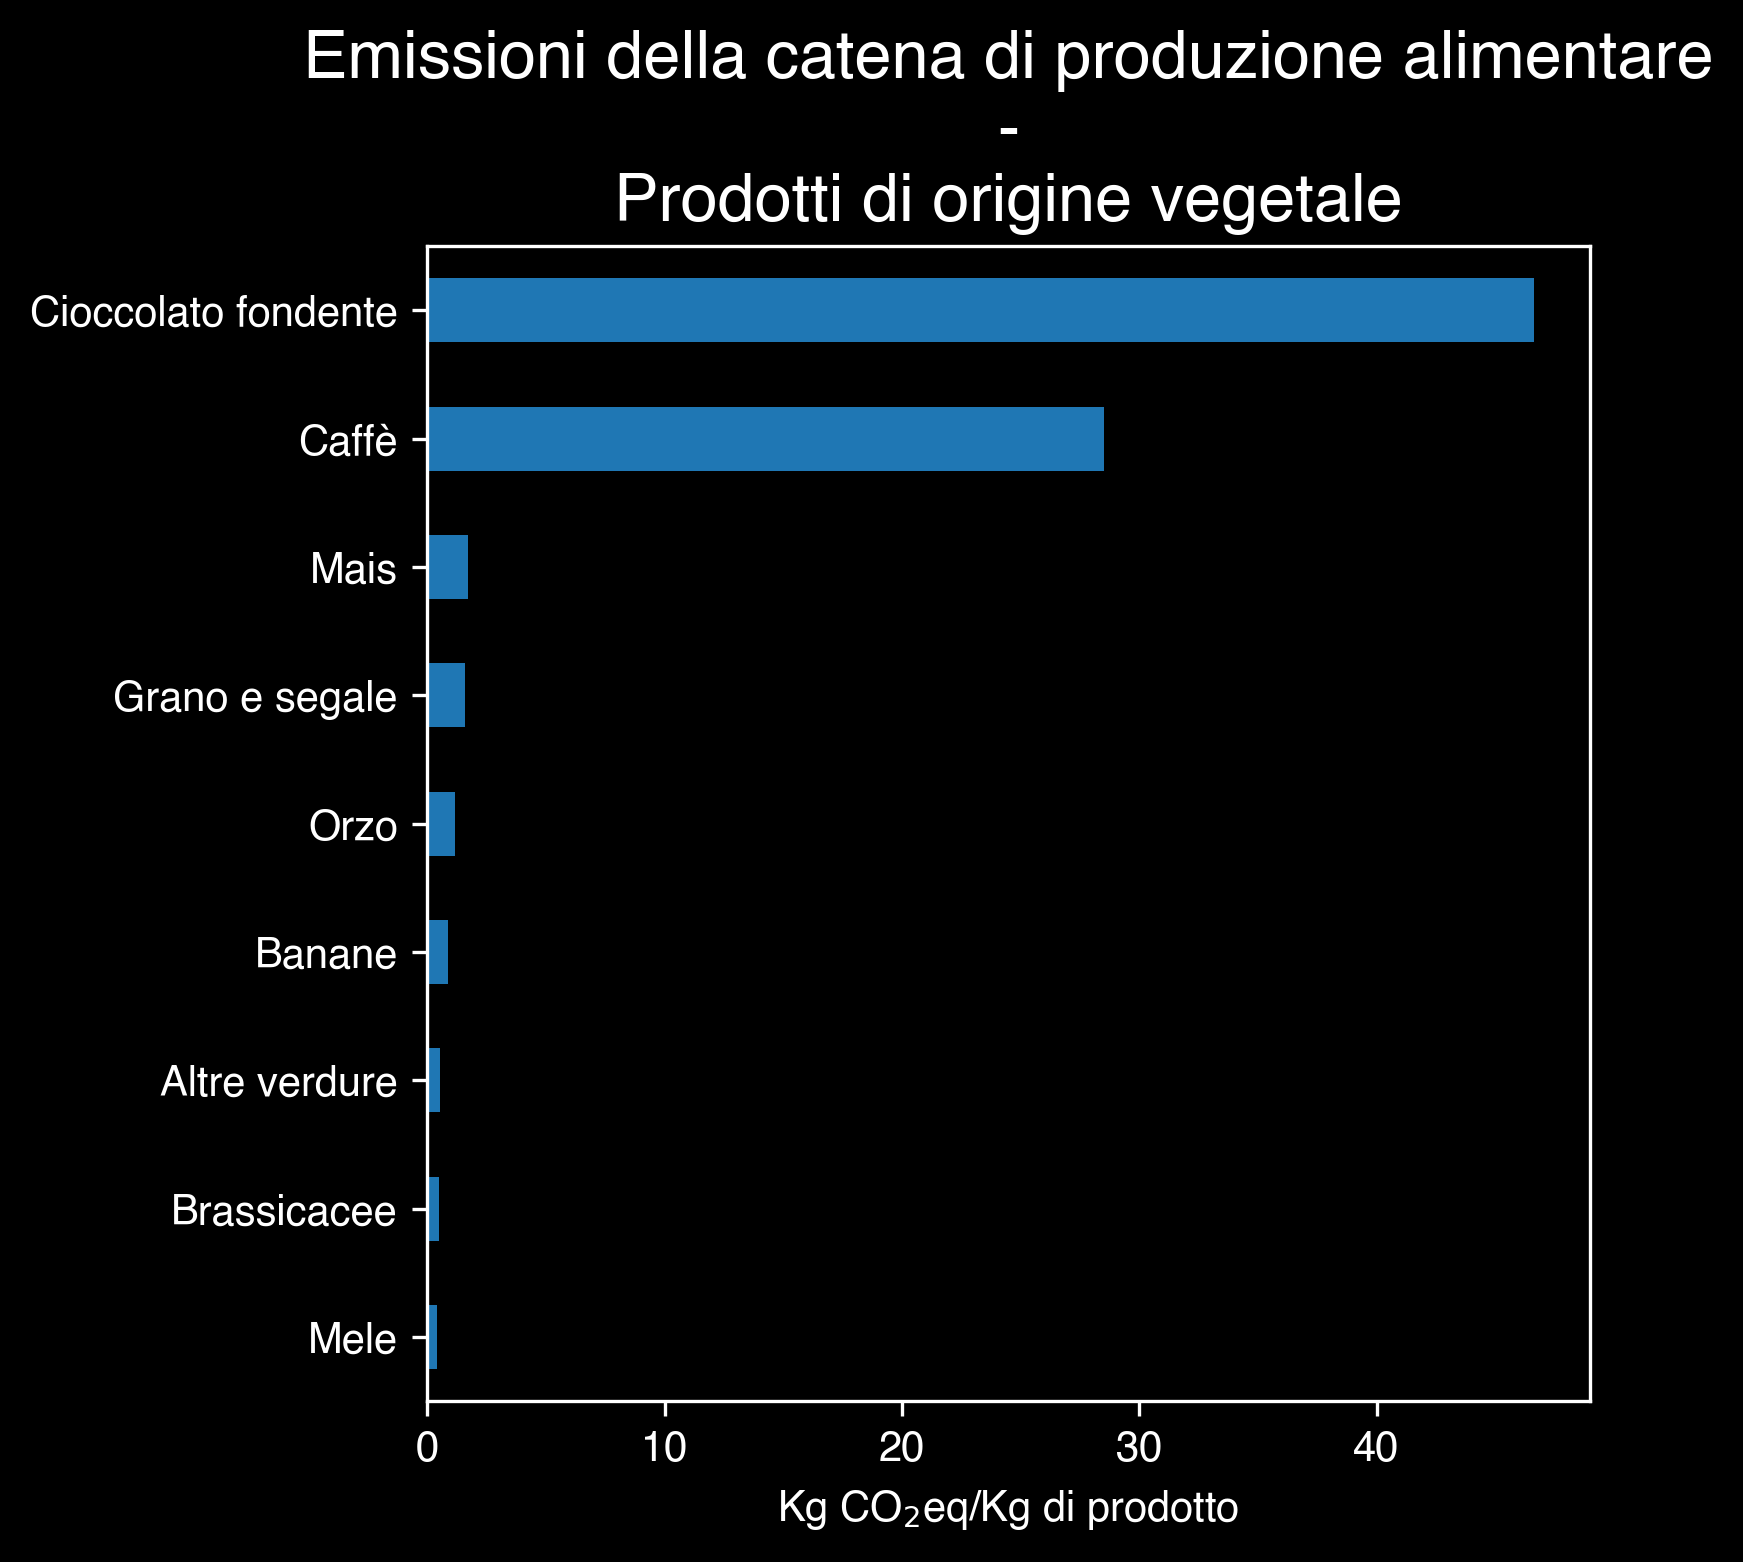

In [8]:
# vegetables
fig, ax = plt.subplots(figsize=(5, 5))
fe_vegetables.sum(axis=1).plot.barh(ax=ax)
ax.set_title(
    "Emissioni della catena di produzione alimentare\n-\nProdotti di origine vegetale"
)
ax.set_xlabel("Kg CO$_2$eq/Kg di prodotto")
ax.set_ylabel(None)
fig.savefig(images_dir / "food_emission_vegetables_total.png")